In [1]:
import pandas
import datetime
import scipy.optimize
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
%matplotlib inline
from matplotlib import rcParams

In [11]:
# some constants and cutoffs
mincutOffLosVel = 50.
maxcutOffLosVel = 2000.
mincutOffspWdth = 100.
maxcutOffspWdth = 500.
minCutOffPwr = 3.

In [12]:
inpCols = [ "beam", "range", "geoAzm", "magAzm", "vLos"\
           , "MLAT", "MLT", "MLON", "GLAT", "GLON", "radId"\
           , "radCode","normMLT", "normMLTRound", "spwdth", "pwr" ]
velsDataDF = pandas.read_csv("../data/apr9-840-losVels.txt")
velsDataDF.columns = inpCols
velsDataDF = velsDataDF[ (abs(velsDataDF["vLos"]) >= mincutOffLosVel) &\
                       (velsDataDF["spwdth"] >= mincutOffspWdth)&\
                       (velsDataDF["pwr"] >= minCutOffPwr)&\
                       (abs(velsDataDF["vLos"]) <= maxcutOffLosVel)&\
                       (velsDataDF["spwdth"] <= maxcutOffspWdth)].reset_index(drop=True)
velsDataDF.head()

,beam,range,geoAzm,magAzm,vLos,MLAT,MLT,MLON,GLAT,GLON,radId,radCode,normMLT,normMLTRound,spwdth,pwr
0,5,27,-41.65,-38.83,-378.1679,56.7707,2.5717,-18.7139,45.3710,-89.3080,33,bks,2.5717,2,108.6326,12.8346
1,5,28,-41.65,-39.16,-396.3842,57.0027,2.5290,-19.3536,45.6378,-89.7470,33,bks,2.5290,2,108.6326,9.4804
2,5,29,-41.65,-39.50,-379.2044,57.2309,2.4859,-20.0005,45.9024,-90.1899,33,bks,2.4859,2,108.6326,8.7086
3,5,30,-41.65,-39.85,-368.0763,57.4553,2.4423,-20.6546,46.1649,-90.6368,33,bks,2.4423,2,101.2517,7.1071
4,6,25,-37.79,-33.55,-221.1927,56.8363,2.7261,-16.3974,45.3789,-87.7046,33,bks,2.7261,2,102.3670,14.6025


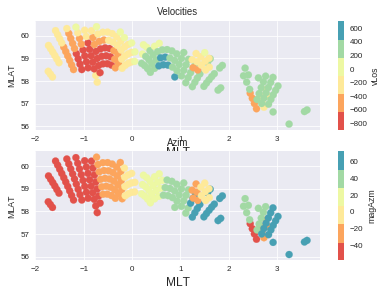

In [25]:
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Spectral"))
# Plot using matplotlib
fig1 = plt.figure()
ax1 = fig1.add_subplot(211)
velsDataDF.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='vLos',
              s=50., cmap=seaMap, ax=ax1)
ax1.set_ylabel("MLAT")
ax1.set_xlabel("MLT", fontsize=12)
ax1.set_title( "Velocities" )
ax2 = fig1.add_subplot(212)
velsDataDF.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='magAzm',
              s=50., cmap=seaMap, ax=ax2)
ax2.set_ylabel("MLAT")
ax2.set_xlabel("MLT", fontsize=12)
ax2.set_title( "Azim" )
# ax.set_ylim( [55., 62.] )
fig1.savefig("../figs/lShellVelsAzims.pdf",bbox_inches='tight')
# ax.get_figure().savefig("../figs/sapsVels.pdf",bbox_inches='tight')
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####

In [26]:
minLat = round( velsDataDF["MLAT"].min() )
maxLat = round( velsDataDF["MLAT"].max() )
minMLT = round( velsDataDF["normMLT"].min() )
maxMLT = round( velsDataDF["normMLT"].max() )
print minLat, maxLat, minMLT, maxMLT
print "56.0959 60.3891"

56.0 60.0 -2.0 4.0
56.0959 60.3891


In [19]:
velsDataDF["normMLT"].describe()
# print velsDataDF["normMLT"].min(), velsDataDF["normMLT"].max()

count    199.000000
mean       0.464780
std        1.413622
min       -1.734500
25%       -0.721450
50%        0.302900
75%        1.492950
max        3.617200
Name: normMLT, dtype: float64